# Data Immersion. Task 6.5 Unsupervised Machine Learning. Clustering

## Table of content

## 1. Import libraries and file
## 2. Data wrangling and cleaning
## 3. The elbow technic
## 4. K-means method (clustering)

### 1 Import libraries and K-means algorithm.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where we import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [14]:
# This command alows us to display visualization inline the cell
%matplotlib inline

In [15]:
# Define dataframe
df = pd.read_csv(r"C:\Users\azikb\Downloads\Bike Sales in Europe and USA\Prepared Data\Sales_clean.csv")

### 2 Data cleaning. Data wrangling.

In [17]:
df.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [18]:
# Choose columns to analysis
columns = ['Order_Quantity', 'Cost', 'Revenue', 'Profit','Unit_Price']

In [19]:
df_analysis = df[columns]

In [20]:
print(df_analysis.dtypes) # checking data frame, if there are only numeric data.

Order_Quantity    int64
Cost              int64
Revenue           int64
Profit            int64
Unit_Price        int64
dtype: object


In [21]:
# Check how many extreme values

df_analysis[df_analysis['Cost'] >10000]

,Order_Quantity,Cost,Revenue,Profit,Unit_Price
111072,27,40014,54069,14055,2384
111073,29,42978,58074,15096,2384


In [22]:
# Let's delete extreme values. I decided to clean extreme values in 'Cost' columns
df_analysis = df_analysis[df_analysis['Cost'] <= 20000]

In [23]:
df_analysis.shape

(112034, 5)

### 3 The elbow technic

In [25]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [26]:
score = [kmeans[i].fit(df_analysis).score(df_analysis) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\azikb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\azikb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\azikb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\azikb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\azikb\anaconda3\Lib\site-packages\sklearn\clust

[-389678341012.79816,
 -122430348833.19264,
 -60398195331.60903,
 -44802508385.43262,
 -31228347929.959984,
 -24309558503.870907,
 -20209236326.984104,
 -16560047359.677753,
 -14270195748.712606]

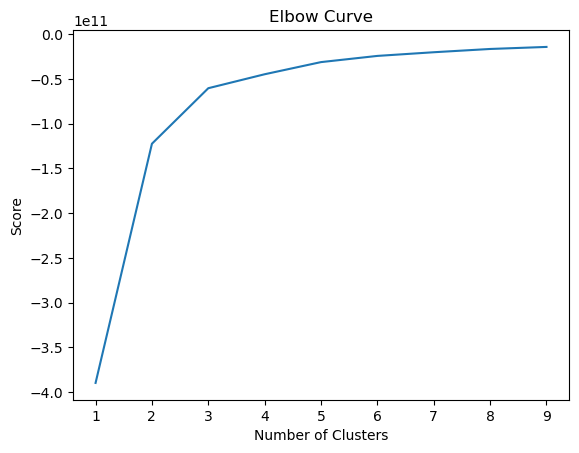

In [27]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## In the Plot chart we see Elbow Curve. It has two drastic changes in the Curve. On the x-axis it is 2 to 3. After number three on x-axis we have a relatively straight line. In my opinion, i would say the number of clusters is three.

### 4. k-means clustering

In [30]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [31]:
# Fit the k-means object to the data.

kmeans.fit(df_analysis)

C:\Users\azikb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [32]:
df_analysis['clusters'] = kmeans.fit_predict(df_analysis)

C:\Users\azikb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
df_analysis.head()

,Order_Quantity,Cost,Revenue,Profit,Unit_Price,clusters
0,8,360,950,590,120,0
1,8,360,950,590,120,0
2,23,1035,2401,1366,120,1
3,20,900,2088,1188,120,0
4,4,180,418,238,120,0


In [34]:
df_analysis['clusters'].value_counts()

clusters
0    94722
1    14870
2     2442
Name: count, dtype: int64

C:\Users\azikb\AppData\Local\Temp\ipykernel_32864\624827557.py:6: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  ax = sns.scatterplot(x=df_analysis['Cost'], y=df_analysis['Revenue'], hue=kmeans.labels_, s=100, palette=custom_palette)


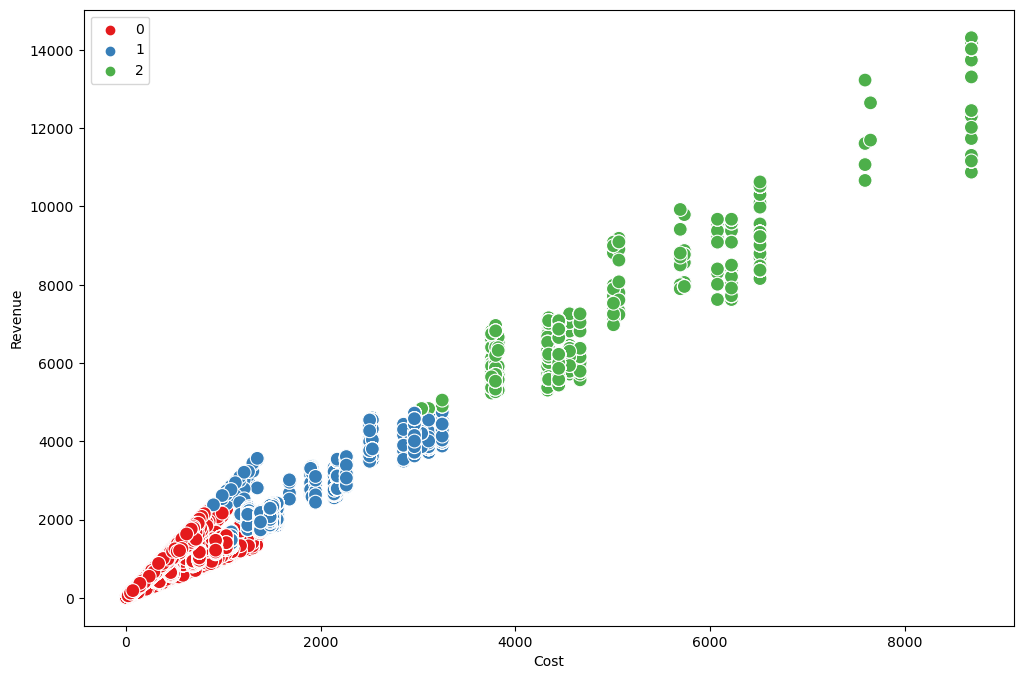

In [35]:
# Plot the clusters for the "Revenue" and "Costs" variables.

custom_palette = sns.color_palette("Set1", as_cmap=False)

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_analysis['Cost'], y=df_analysis['Revenue'], hue=kmeans.labels_, s=100, palette=custom_palette) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Cost') # Label x-axis.
plt.ylabel('Revenue') # Label y-axis.
plt.show()

In [36]:
# Save the data with cluster labels to an Excel file
df_analysis.to_excel('clustered_data.xlsx', index=False)

#### As we can see the Revenue is depends on Cost..we have a positive correlation. The Revenue is going up when we have a high cost of products

C:\Users\azikb\AppData\Local\Temp\ipykernel_32864\2185369512.py:4: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  ax = sns.scatterplot(x=df_analysis['Order_Quantity'], y=df_analysis['Revenue'], hue=kmeans.labels_, s=100, palette=custom_palette)


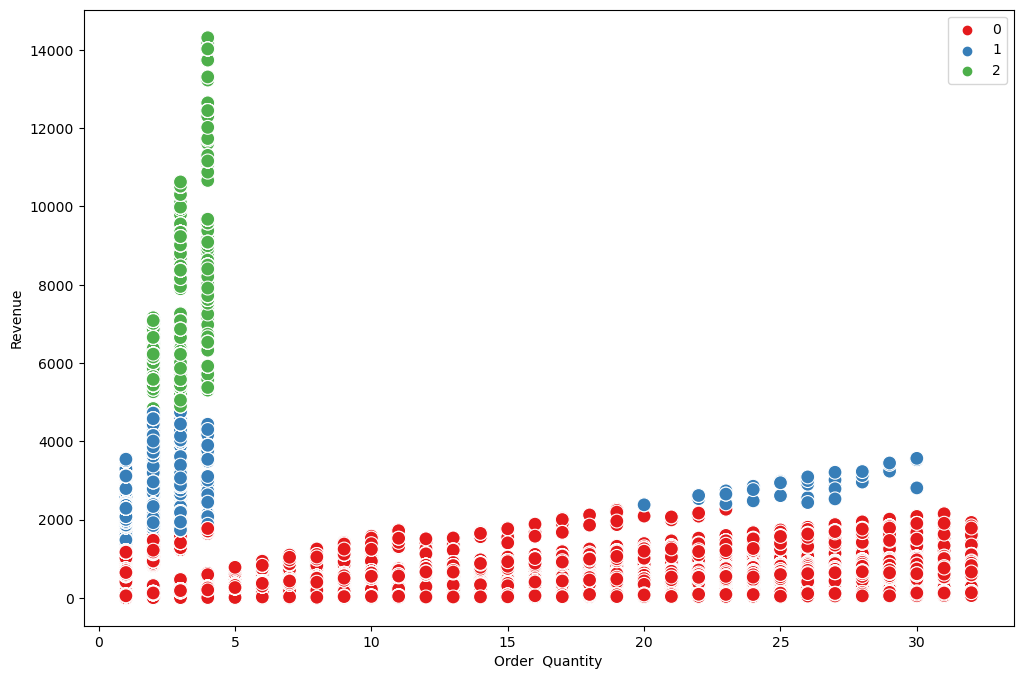

In [38]:
# Plot the clusters for the "Order_Quantity" and "Revenue'.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_analysis['Order_Quantity'], y=df_analysis['Revenue'], hue=kmeans.labels_, s=100, palette=custom_palette) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Order  Quantity') # Label x-axis.
plt.ylabel('Revenue') # Label y-axis.
plt.show()

custom_palette = sns.color_palette("Set1", as_cmap=False)

#### The above plot shows that the Revenue doesn't depend on the Order Quantity. We see that blue points have low order quantity but bring high Revenue. On the other hand, green points have high numbers of Order Quantity but bring low Revenue. Interesting facts bring us red points. They are split into 2 groups: one with low Order Quantity another with high Quantity. But they are bring the same Revenue.

C:\Users\azikb\AppData\Local\Temp\ipykernel_32864\296958738.py:4: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  ax = sns.scatterplot(x=df_analysis['Unit_Price'], y=df_analysis['Revenue'], hue=kmeans.labels_, s=100, palette=custom_palette)


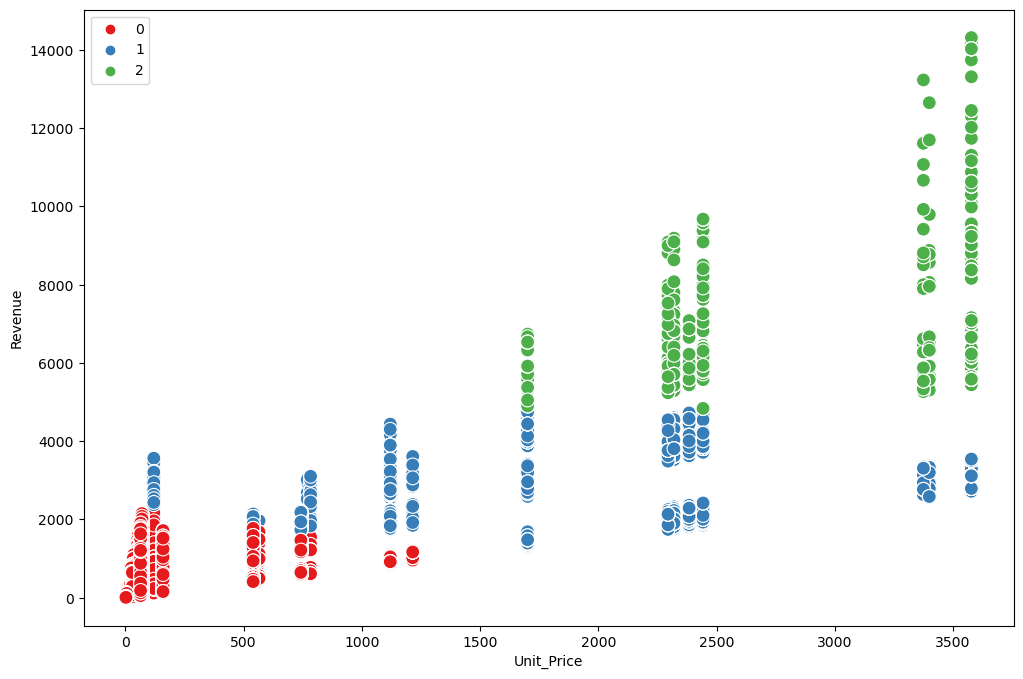

In [40]:
# Plot the clusters for the "Unit_Price" and "Revenue'.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_analysis['Unit_Price'], y=df_analysis['Revenue'], hue=kmeans.labels_, s=100, palette=custom_palette) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Unit_Price') # Label x-axis.
plt.ylabel('Revenue') # Label y-axis.
plt.show()

custom_palette = sns.color_palette("Set1", as_cmap=False)

#### This plot shows us that the higher the Unit Price the higher the Revenue.

In [42]:
df_analysis.loc[df_analysis['clusters'] == 2, 'cluster'] = 'green'
df_analysis.loc[df_analysis['clusters'] == 1, 'cluster'] = 'blue'
df_analysis.loc[df_analysis['clusters'] == 0, 'cluster'] = 'red'

In [43]:
# Let's group data frame by Groups, and make descriptive statistics.
df_analysis.groupby('cluster').agg({'Cost':['mean', 'median'], 
                         'Order_Quantity':['mean', 'median'], 
                         'Unit_Price':['mean', 'median'],
                          'Revenue':['mean', 'median']})

Cost         Order_Quantity          Unit_Price          \
                mean  median           mean median         mean  median   
cluster                                                                   
blue     1690.297377  1482.0       1.362139    1.0  2381.595898  2320.0   
green    4599.888616  4342.0       2.726454    3.0  2907.782146  2443.0   
red       172.398081    63.0      13.795486   13.0    87.917337    10.0   

             Revenue          
                mean  median  
cluster                       
blue     2540.887559  2272.0  
green    6903.718264  6655.0  
red       317.484333   139.0

### In general, we see that the unsupervised analysis (clustering) was split data frame by 3 Groups. Green points had low Cost, low Unit Price by high Order Quantity. These products occupy a low niche of the Bike market and bring low Revenue.
### Red points are the middle niche. They have a high range of Unit Prices and bring a middle size of Revenue.
### The blue points have high Unit Price, Cost, but low Order Quantity. I think these is high quality, top products for the Bike market. 